In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

filename = 'ecoli.csv'
# importing pandas
import pandas as pd
  
# read text file into pandas DataFrame
ecoli_df = pd.read_csv(filename)
  
# display DataFrame
print(ecoli_df)

    SEQUENCE_NAME   MCG   GVH   LIP  CHG   AAC  ALM1  ALM2 SITE
0       AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35   cp
1      ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44   cp
2      ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46   cp
3      ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36   cp
4       ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35   cp
..            ...   ...   ...   ...  ...   ...   ...   ...  ...
331    TREA_ECOLI  0.74  0.56  0.48  0.5  0.47  0.68  0.30   pp
332    UGPB_ECOLI  0.71  0.57  0.48  0.5  0.48  0.35  0.32   pp
333    USHA_ECOLI  0.61  0.60  0.48  0.5  0.44  0.39  0.38   pp
334    XYLF_ECOLI  0.59  0.61  0.48  0.5  0.42  0.42  0.37   pp
335    YTFQ_ECOLI  0.74  0.74  0.48  0.5  0.31  0.53  0.52   pp

[336 rows x 9 columns]


In [ ]:
del ecoli_df['SEQUENCE_NAME']
ecoli_df.head()


,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [ ]:
ecoli_df.shape

(336, 8)

In [ ]:
print(ecoli_df['SITE'].unique())
print(len(ecoli_df['SITE'].unique()))

['cp' 'im' 'imS' 'imL' 'imU' 'om' 'omL' 'pp']
8


In [ ]:
X = ecoli_df.iloc[:,0:6]
print(X.head())
y = ecoli_df.iloc[:,7]
print(y.head())

    MCG   GVH   LIP  CHG   AAC  ALM1
0  0.49  0.29  0.48  0.5  0.56  0.24
1  0.07  0.40  0.48  0.5  0.54  0.35
2  0.56  0.40  0.48  0.5  0.49  0.37
3  0.59  0.49  0.48  0.5  0.52  0.45
4  0.23  0.32  0.48  0.5  0.55  0.25
0    cp
1    cp
2    cp
3    cp
4    cp
Name: SITE, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import numpy as np
import pandas as pd
y=le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3
 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
Rf = RandomForestClassifier(n_estimators=40)
Rf.fit(X_train, y_train)
scores1=Rf.score(X_test, y_test)
print('Accuracy: %.6f (%.6f)' % (scores1, std(scores1)))

Accuracy: 0.844333 (0.044632)


In [ ]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

entr_model.fit(X_train, y_train)
scores1=entr_model.score(X_test, y_test)
print('Accuracy: %.6f (%.6f)' % (scores1, std(scores1)))

Accuracy: 0.789561 (0.050692)


In [ ]:
ab = AdaBoostClassifier(n_estimators=100, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

ab.fit(X_train, y_train)
scores1=ab.score(X_test, y_test)
print('Accuracy: %.6f (%.6f)' % (scores1, std(scores1)))

Accuracy: 0.657353 (0.079984)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, p=2, metric= "euclidean")
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

knn.fit(X_train, y_train)
scores1=knn.score(X_test, y_test)
print('Accuracy: %.6f (%.6f)' % (scores1, std(scores1)))

Accuracy: 0.846111 (0.044115)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
NB = GaussianNB()
NB.fit(X_train, y_train)
scores1=NB.score(X_test, y_test)

print('Accuracy: %.6f (%.6f)' % (scores1, std(scores1)))


Accuracy: 0.669601 (0.085461)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ecoli_df.columns:
    ecoli_df[i]=le.fit_transform(ecoli_df[i])
ecoli_df.head()

,MCG,GVH,LIP,CHG,AAC,ALM1,ALM2,SITE
0,39,6,0,0,34,14,21,0
1,3,17,0,0,32,25,30,0
2,46,17,0,0,27,27,32,0
3,49,26,0,0,30,35,22,0
4,13,9,0,0,33,15,21,0


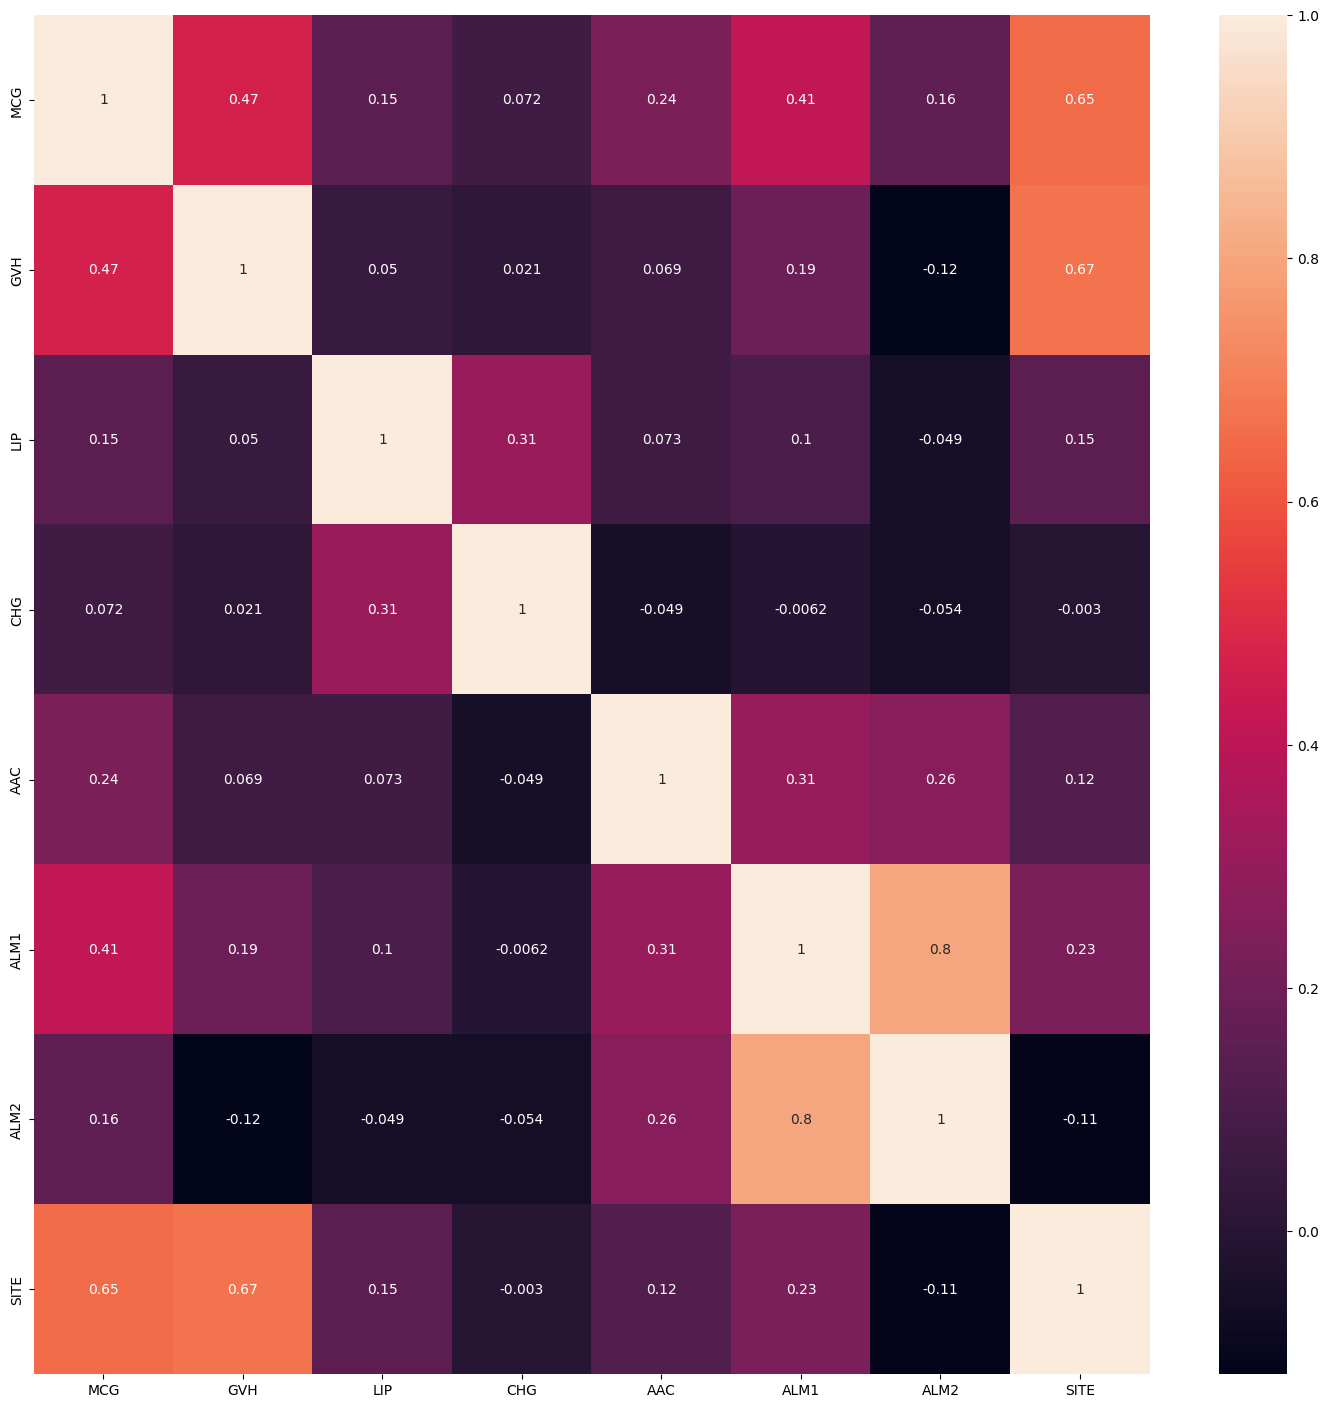

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18),dpi=100)
sns.heatmap(ecoli_df.corr(),annot=True)